In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.special import binom
np.set_printoptions(suppress=True)

In [2]:
def bernstein_coeff_order10(t_list,t_init,t_fin):
    l = t_fin - t_init
    t_list = (t_list - t_init)/l
    n = 10
    
    P0 = binom(n,0)*((1-t_list)**(n-0))*t_list**0
    P1 = binom(n,1)*((1-t_list)**(n-1))*t_list**1
    P2 = binom(n,2)*((1-t_list)**(n-2))*t_list**2
    P3 = binom(n,3)*((1-t_list)**(n-3))*t_list**3
    P4 = binom(n,4)*((1-t_list)**(n-4))*t_list**4
    P5 = binom(n,5)*((1-t_list)**(n-5))*t_list**5
    P6 = binom(n,6)*((1-t_list)**(n-6))*t_list**6
    P7 = binom(n,7)*((1-t_list)**(n-7))*t_list**7
    P8 = binom(n,8)*((1-t_list)**(n-8))*t_list**8
    P9 = binom(n,9)*((1-t_list)**(n-9))*t_list**9
    P10 = binom(n,10)*((1-t_list)**(n-10))*t_list**10

    P0dot = -10.0*(-t_list + 1)**9
    P1dot = -90.0*t_list*(-t_list + 1)**8 + 10.0*(-t_list + 1)**9
    P2dot = -360.0*t_list**2*(-t_list + 1)**7 + 90.0*t_list*(-t_list + 1)**8
    P3dot = -840.0*t_list**3*(-t_list + 1)**6 + 360.0*t_list**2*(-t_list + 1)**7
    P4dot = -1260.0*t_list**4*(-t_list + 1)**5 + 840.0*t_list**3*(-t_list + 1)**6
    P5dot = -1260.0*t_list**5*(-t_list + 1)**4 + 1260.0*t_list**4*(-t_list + 1)**5
    P6dot = -840.0*t_list**6*(-t_list + 1)**3 + 1260.0*t_list**5*(-t_list + 1)**4
    P7dot = -360.0*t_list**7*(-t_list + 1)**2 + 840.0*t_list**6*(-t_list + 1)**3
    P8dot = 45.0*t_list**8*(2*t_list - 2) + 360.0*t_list**7*(-t_list + 1)**2
    P9dot = -10.0*t_list**9 + 9*t_list**8*(-10.0*t_list + 10.0)
    P10dot = 10.0*t_list**9

    P0ddot = 90.0*(-t_list + 1)**8
    P1ddot = 720.0*t_list*(-t_list + 1)**7 - 180.0*(-t_list + 1)**8
    P2ddot = 2520.0*t_list**2*(-t_list + 1)**6 - 1440.0*t_list*(-t_list + 1)**7 + 90.0*(-t_list + 1)**8
    P3ddot = 5040.0*t_list**3*(-t_list + 1)**5 - 5040.0*t_list**2*(-t_list + 1)**6 + 720.0*t_list*(-t_list + 1)**7
    P4ddot = 6300.0*t_list**4*(-t_list + 1)**4 - 10080.0*t_list**3*(-t_list + 1)**5 + 2520.0*t_list**2*(-t_list + 1)**6
    P5ddot = 5040.0*t_list**5*(-t_list + 1)**3 - 12600.0*t_list**4*(-t_list + 1)**4 + 5040.0*t_list**3*(-t_list + 1)**5
    P6ddot = 2520.0*t_list**6*(-t_list + 1)**2 - 10080.0*t_list**5*(-t_list + 1)**3 + 6300.0*t_list**4*(-t_list + 1)**4
    P7ddot = -360.0*t_list**7*(2*t_list - 2) - 5040.0*t_list**6*(-t_list + 1)**2 + 5040.0*t_list**5*(-t_list + 1)**3
    P8ddot = 90.0*t_list**8 + 720.0*t_list**7*(2*t_list - 2) + 2520.0*t_list**6*(-t_list + 1)**2
    P9ddot = -180.0*t_list**8 + 72*t_list**7*(-10.0*t_list + 10.0)
    P10ddot = 90.0*t_list**8
    
    P = np.vstack((P0, P1, P2, P3, P4, P5, P6, P7, P8, P9, P10 ))

    Pdot = np.vstack((P0dot, P1dot, P2dot, P3dot, P4dot, P5dot, P6dot, P7dot, P8dot, P9dot, P10dot))/l

    Pddot = np.vstack((P0ddot, P1ddot, P2ddot, P3ddot, P4ddot, P5ddot, P6ddot, P7ddot, P8ddot, P9ddot, P10ddot))/(l**2)
    
    return P.T, Pdot.T, Pddot.T

def bern_coeff_solver(x0,xt,xw,y0,yt,yw,tlist,P,Pdot,Pddot): 
    a = np.array([P[0,:],P[-1,:],P[20,:],Pdot[0,:],Pdot[-1,:],Pddot[0,:],Pddot[-1,:]])
    bx = np.array([[x0],[xt],[xw],[0],[0],[0],[0]])
    by = np.array([[y0],[yt],[yw],[0],[0],[0],[0]])
    b = np.hstack((bx,by))
    x = np.linalg.lstsq(a,b,rcond=None)[0]
    return x

def gib_bernie(num_samples,x0,xt,xw,y0,yt,yw,t0,tf,tw):
    l = tf-t0
    tlist = np.linspace(t0,tf,num_samples)
    P, Pdot, Pddot = bernstein_coeff_order10(tlist,t0,tf) 
    x = bern_coeff_solver(x0,xt,xw,y0,yt,yw,tlist,P,Pdot,Pddot)
    tlist = np.linspace(t0,tf,num_samples)
    traj_list = np.dot(P,x)
    v_list = np.dot(Pdot,x)
    acc_list = np.dot(Pddot,x)
    return tlist, traj_list, x, v_list, acc_list

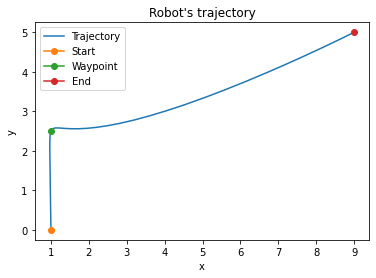

In [3]:
x_init = 1 # Starting x
x_fin = 9 # Finishing x
x_wp = 1 # x WayPoint

y_init = 0 # Starting y
y_fin = 5 # Finishing y
y_wp = 2.5 # y WayPoint

t_init = 0 # Starting t
t_fin = 5 # Finishing t
t_wp = 2 # t waypoint

num_samples = 50

tlist, traj_list, a, v_list, acc_list = gib_bernie(num_samples, \
                                                   x_init, x_fin ,x_wp, \
                                                   y_init, y_fin, y_wp, \
                                                   t_init, t_fin, t_wp)

plt.plot(traj_list[:,0],traj_list[:,1])
plt.title("Robot's trajectory")
plt.plot(x_init, y_init, marker='o')
plt.plot(x_wp, y_wp, marker='o')
plt.plot(x_fin, y_fin, marker='o')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["Trajectory","Start","Waypoint","End"])
plt.show()

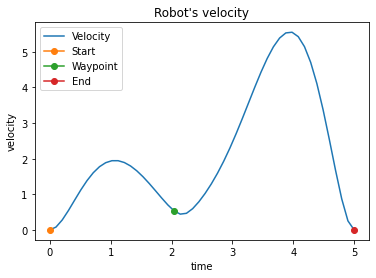

In [4]:
dt = (t_fin - t_init)/num_samples
t_mid_idx = int(t_wp/dt)

plt.plot(tlist, np.sqrt(v_list[:,0]**2 + v_list[:,1]**2))
plt.title("Robot's velocity")
plt.plot(tlist[0], np.sqrt(v_list[0,0]**2 + v_list[0,1]**2), marker='o')
plt.plot(tlist[t_mid_idx], np.sqrt(v_list[t_mid_idx,0]**2 + v_list[t_mid_idx,1]**2), marker='o')
plt.plot(tlist[-1], np.sqrt(v_list[-1,0]**2 + v_list[-1,1]**2), marker='o')
plt.xlabel("time")
plt.ylabel("velocity")
plt.legend(["Velocity","Start","Waypoint","End"])
plt.show()

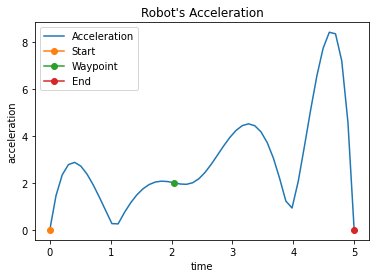

In [6]:
plt.plot(tlist, np.sqrt(acc_list[:,0]**2 + acc_list[:,1]**2))
plt.title("Robot's Acceleration")
plt.plot(tlist[0], np.sqrt(acc_list[0,0]**2 + acc_list[0,1]**2), marker='o')
plt.plot(tlist[t_mid_idx], np.sqrt(acc_list[t_mid_idx,0]**2 + acc_list[t_mid_idx,1]**2), marker='o')
plt.plot(tlist[-1], np.sqrt(acc_list[-1,0]**2 + acc_list[-1,1]**2), marker='o')
plt.xlabel("time")
plt.ylabel("acceleration")
plt.legend(["Acceleration","Start","Waypoint","End"])
plt.show()